In [1]:
import pandas as pd
import numpy as np

import os.path

training_data = pd.read_parquet(os.path.join("data", "training.parquet"))

In [2]:
training_data.sample(10)

,Category,Text
4377,rec.sport.baseball,In article <1993Apr18.225740.15978@colorado.ed...
9061,talk.politics.misc,"\nIn article <C4z3xw.3EF@news.cso.uiuc.edu>, p..."
9269,talk.politics.misc,\nIn article <1993Apr21.183307.18345@rosevax.r...
4974,comp.os.ms-windows.misc,"\tJust got a ss24X based on its good ratings, ..."
2388,comp.sys.mac.hardware,jeffe@eniac.seas.upenn.edu (george) writes:\n\...
8104,sci.med,I'm told that corn allergy is fairly common. ...
1509,rec.autos,\nMonthly posting regarding the Buick Grand Na...
5909,comp.os.ms-windows.misc,>=> Pete Holsberg (pjh@mccc.edu) wrote:\n>=> :...
19466,talk.religion.misc,\nJoakim Ruud (joakimr@ifi.uio.no) writes:\n\n...
661,talk.politics.mideast,In article <C6x81M.EJF@news.cis.umn.edu> prabh...


In [3]:
import cloudpickle as cp
feature_pipeline = cp.load(open('feature_pipeline.sav', 'rb'))

In [7]:
training_vecs = feature_pipeline.fit_transform(training_data["Text"])

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection

In [9]:
rfc = RandomForestClassifier(n_estimators=500, max_depth=5, random_state=404)

In [10]:
rfc.fit(training_vecs, training_data["Category"])

RandomForestClassifier(max_depth=5, n_estimators=500, random_state=404)

In [11]:
rfc.score(training_vecs, training_data["Category"])

0.5654262565426257

In [14]:
testing_data = pd.read_parquet(os.path.join("data", "testing.parquet"))
testing_vecs=feature_pipeline.transform(testing_data["Text"])
rfc.score(testing_vecs, testing_data["Category"])

0.5204952317215995

In [17]:
from mlworkflows import plot

df, chart =plot.confusion_matrix(testing_data["Category"], rfc.predict(testing_vecs))

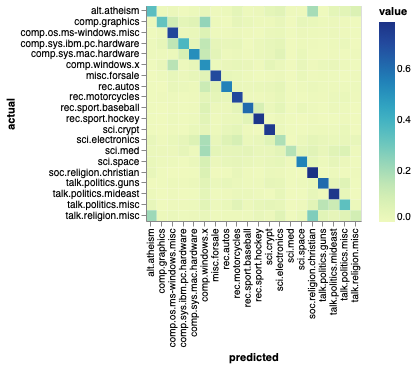

In [18]:
chart

In [20]:
from sklearn.metrics import classification_report
print(classification_report(testing_data["Category"], rfc.predict(testing_vecs)))

                          precision    recall  f1-score   support

             alt.atheism       0.44      0.35      0.39       284
           comp.graphics       0.66      0.32      0.43       303
 comp.os.ms-windows.misc       0.52      0.71      0.60       293
comp.sys.ibm.pc.hardware       0.56      0.38      0.45       303
   comp.sys.mac.hardware       0.55      0.51      0.53       286
          comp.windows.x       0.22      0.51      0.30       280
            misc.forsale       0.65      0.70      0.67       305
               rec.autos       0.57      0.55      0.56       300
         rec.motorcycles       0.54      0.70      0.61       317
      rec.sport.baseball       0.64      0.61      0.62       291
        rec.sport.hockey       0.69      0.77      0.73       310
               sci.crypt       0.62      0.75      0.68       303
         sci.electronics       0.21      0.19      0.20       274
                 sci.med       0.81      0.17      0.28       314
         